#### Imports 

In [184]:
%load_ext autoreload
%autoreload 2
from clean_data import dataset_ball, dataset_detections
from player_id import assign_players
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Convert Ball Trajectory Data into Data Frame

In [177]:
ball_url = Path("C:/Users/mijin/OneDrive/Desktop/data_science/project/datasets/volleyball_ball_annotation")
balldata = dataset_ball(ball_url)
display(balldata)

,video_id,frame_id,frame_time,x_coord,y_coord,ball_visible
0,0,3596,0,613,237,True
1,0,3596,1,634,244,True
2,0,3596,2,655,245,True
3,0,3596,3,666,248,True
4,0,3596,4,681,252,True
...,...,...,...,...,...,...
198025,54,73290,36,672,322,True
198026,54,73290,37,681,311,True
198027,54,73290,38,693,303,True
198028,54,73290,39,702,298,True


#### Convert Action Dataset to DataFrame 

In [60]:
actions_url = Path("C:/Users/mijin/OneDrive/Desktop/data_science/project/datasets/volleyball-detections")
actionsdata = dataset_detections(actions_url)
display(actionsdata.head(400))
#coordinates in this case are bounding box coordinates for each player 

,video_id,frame_id,Image Filename,Action Class ID,X,Y,Width,Height,Confidence,Action Label,frame_time
0,0,3596,3576.jpg,6,435,434,56,138,0.960531,standing,0
1,0,3596,3576.jpg,6,673,393,53,145,0.928273,standing,0
2,0,3596,3576.jpg,6,927,437,65,176,0.924282,standing,0
3,0,3596,3576.jpg,6,468,344,47,112,0.922084,standing,0
4,0,3596,3576.jpg,6,371,415,64,150,0.898490,standing,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,3646,3636.jpg,7,429,321,46,102,0.926598,standing,10
396,0,3646,3636.jpg,7,234,440,62,130,0.873944,standing,10
397,0,3646,3637.jpg,7,958,459,93,133,0.998764,moving,11
398,0,3646,3637.jpg,7,800,423,64,136,0.984477,standing,11


#### Merge Both DataSets

In [66]:
#there was a type error when merging
actionsdata["frame_time"] = actionsdata["frame_time"].astype(int)
actionsdata["frame_id"] = actionsdata["frame_id"].astype(int)
balldata["frame_time"] = balldata["frame_time"].astype(int)
balldata["frame_id"] = balldata["frame_id"].astype(int)
merged = pd.merge(actionsdata, balldata, on=["frame_id", "frame_time"])
display(merged.head())

,video_id_x,frame_id,Image Filename,Action Class ID,X,Y,Width,Height,Confidence,Action Label,frame_time,video_id_y,x_coord,y_coord,ball_visible
0,0,3596,3576.jpg,6,435,434,56,138,0.960531,standing,0,0,613,237,True
1,0,3596,3576.jpg,6,673,393,53,145,0.928273,standing,0,0,613,237,True
2,0,3596,3576.jpg,6,927,437,65,176,0.924282,standing,0,0,613,237,True
3,0,3596,3576.jpg,6,468,344,47,112,0.922084,standing,0,0,613,237,True
4,0,3596,3576.jpg,6,371,415,64,150,0.898490,standing,0,0,613,237,True


In [ ]:
#current df is merged
prev_frame = pd.DataFrame()
processed_frames = []

for _, curr_frame in merged.groupby('Image Filename'):  
    img_id = curr_frame["Image Filename"].iloc[0]   
    processed_frame = assign_players(curr_frame, prev_frame, img_id)
    processed_frames.append(processed_frame)
    prev_frame = processed_frame.copy()  

final_result = pd.concat(processed_frames, ignore_index=True)
display(final_result.head())

,video_id_x,frame_id,Image Filename,Action Class ID,X,Y,Width,Height,Confidence,Action Label,frame_time,video_id_y,x_coord,y_coord,ball_visible,Player ID
0,0,13286,13266.jpg,7,886,358,69,115,0.996681,standing,0,0,1006,229,True,0
1,0,13286,13266.jpg,7,263,356,49,106,0.980493,standing,0,0,1006,229,True,1
2,0,13286,13266.jpg,7,446,404,47,141,0.974117,standing,0,0,1006,229,True,2
3,0,13286,13266.jpg,7,468,365,41,124,0.967356,standing,0,0,1006,229,True,3
4,0,13286,13266.jpg,7,109,441,55,141,0.950636,standing,0,0,1006,229,True,4


In [234]:
display(final_result.head(20))

,video_id_x,frame_id,Image Filename,Action Class ID,X,Y,Width,Height,Confidence,Action Label,frame_time,video_id_y,x_coord,y_coord,ball_visible,Player ID
0,0,13286,13266.jpg,7,886,358,69,115,0.996681,standing,0,0,1006,229,True,0
1,0,13286,13266.jpg,7,263,356,49,106,0.980493,standing,0,0,1006,229,True,1
2,0,13286,13266.jpg,7,446,404,47,141,0.974117,standing,0,0,1006,229,True,2
3,0,13286,13266.jpg,7,468,365,41,124,0.967356,standing,0,0,1006,229,True,3
4,0,13286,13266.jpg,7,109,441,55,141,0.950636,standing,0,0,1006,229,True,4
5,0,13286,13266.jpg,7,989,440,57,149,0.948281,standing,0,0,1006,229,True,5
6,0,13286,13266.jpg,7,595,368,78,109,0.819143,standing,0,0,1006,229,True,6
7,0,13286,13267.jpg,9,788,414,61,124,0.895397,moving,1,0,1011,234,True,-1
8,0,13286,13267.jpg,9,888,356,67,115,0.995540,standing,1,0,1011,234,True,-1
9,0,13286,13267.jpg,9,257,360,49,105,0.987207,standing,1,0,1011,234,True,-1


#### Linear Regression For Ball Trajectory Data Only

In [171]:
#since no time stamps assume constant time interval
#just use ball data set for now
# balldata = balldata.drop(['ball_visible'], axis=1)
# balldata = balldata.drop(balldata.index[0])
def linear(balldata, datapoints):
    if datapoints:
        subset = balldata.iloc[:datapoints].copy()
    else:
        subset = balldata
    subset['x_velocity'] = subset.groupby('video_id')['x_coord'].diff().abs()
    subset['y_velocity'] = subset.groupby('video_id')['y_coord'].diff().abs()
    #prediction column
    subset['next x coord'] = subset.groupby('video_id')['x_coord'].shift(-1)
    subset['next y coord'] = subset.groupby('video_id')['y_coord'].shift(-1)
    subset.dropna(subset=['next x coord', 'next y coord', 'x_velocity', 'y_velocity'], inplace=True)
    # display(subset.head())

    features = ['x_coord', 'y_coord', 'x_velocity', 'y_velocity']
    target = ['next x coord', 'next y coord']
    X = subset[features]
    y = subset[target]
    #randomly split into 20 80 split
    train_size = int(0.8*len(subset))
    X_train = subset.iloc[:train_size][features]
    y_train = subset.iloc[:train_size][target]
    X_test = subset.iloc[train_size:][features]
    y_test = subset.iloc[train_size:][target]
    # display(y_test)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_pred = linear.predict(X_test)
    #calculate mean error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Squared Error: {mse}")  
    print(f"Mean Absolute Error: {mae}")    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test["next x coord"], y_test["next y coord"], label="Actual", marker='o')
    plt.plot(y_pred[:, 0], y_pred[:,1], label="Predicted", marker='x')
    plt.title(f"Ball Movement using Linear Regression ({datapoints} data points)")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.show()


Root Mean Squared Error (RMSE): 8.58090108797106
Mean Squared Error: 73.63186348154292
Mean Absolute Error: 6.666666844613438


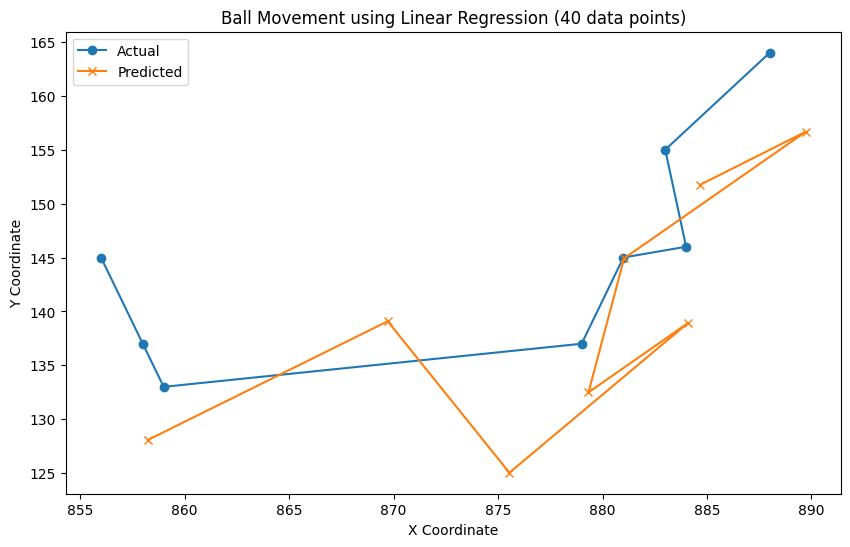

In [172]:
linear(balldata, 40)
# display(balldata)


Root Mean Squared Error (RMSE): 7.737599532136317
Mean Squared Error: 59.87044651971615
Mean Absolute Error: 5.435533963569307


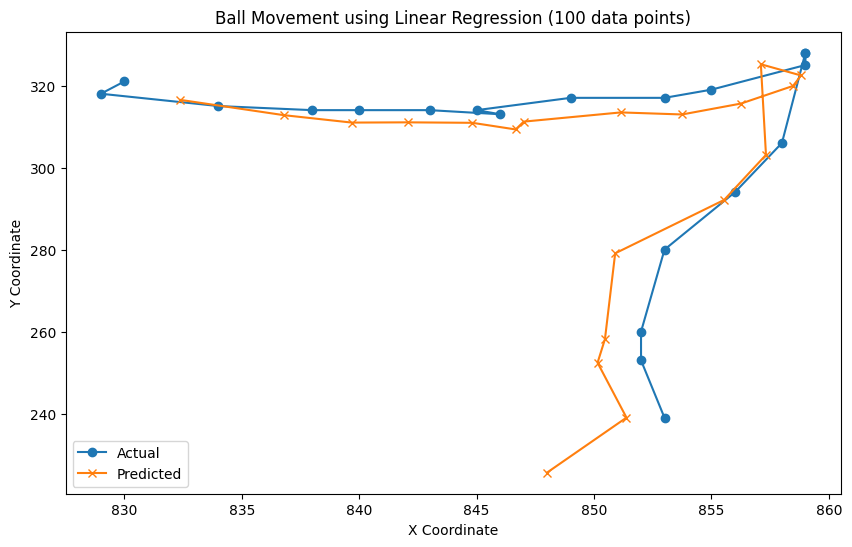

In [173]:
linear(balldata, 100)

Root Mean Squared Error (RMSE): 40.92505296190986
Mean Squared Error: 1674.8599599351273
Mean Absolute Error: 14.178214097045572


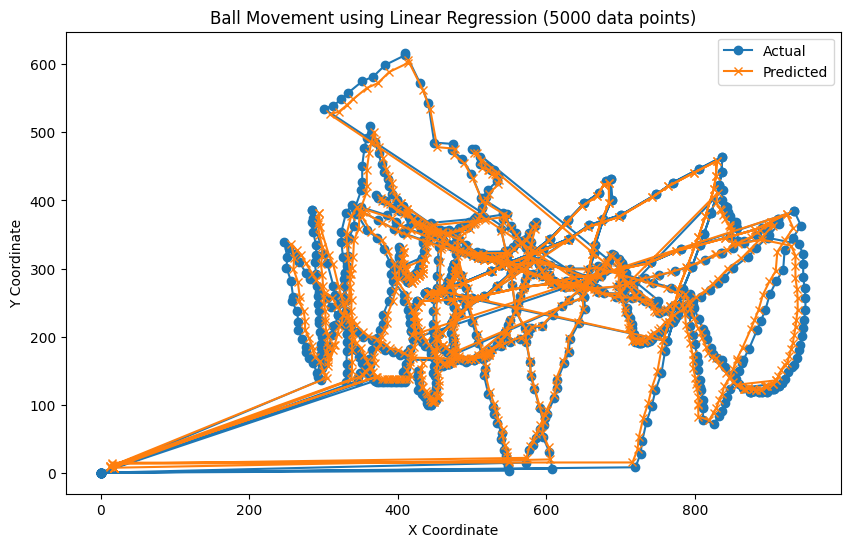

In [174]:
linear(balldata, 5000)

Root Mean Squared Error (RMSE): 53.61268334064168
Mean Squared Error: 2874.319814983918
Mean Absolute Error: 14.671437081853272


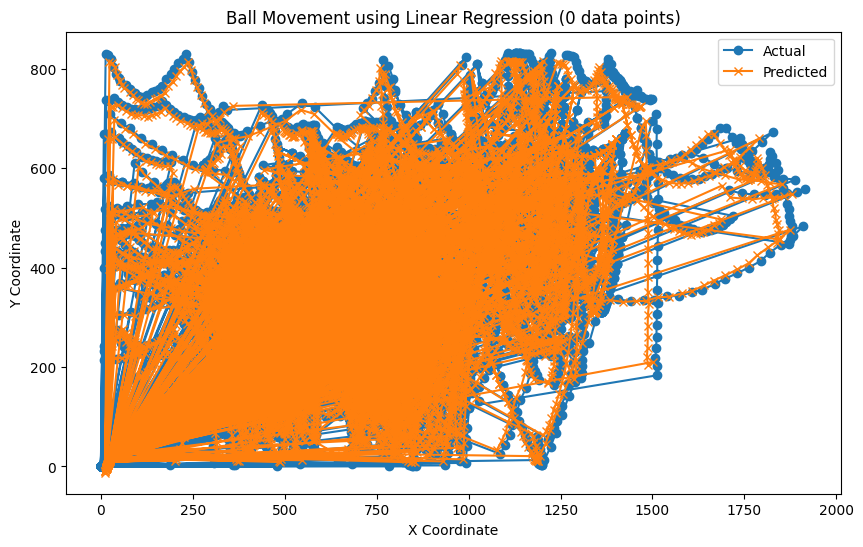

In [175]:
linear(balldata, 0)

#### Neural Network for Classifying Action Labels First Model

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tf_keras.models import Sequential
from tf_keras.layers import Dropout, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tf_keras.utils import to_categorical

nn_set = merged.copy()
# display(nn_set)
# balldata = balldata.drop(['ball_visible'], axis=1)
nn_set.drop(['video_id_x'], axis=1, inplace=True)
nn_set.drop(['video_id_y'], axis=1, inplace=True)
nn_set.drop(['Action Class ID'], axis=1, inplace=True)
nn_set.drop(['ball_visible'], axis=1, inplace=True)
#encode action labels 
encoder = LabelEncoder()
nn_set['Encoded Actions'] = encoder.fit_transform(nn_set['Action Label'])
target = 'Encoded Actions'
features = ['X', "Y", "x_coord", "y_coord"]
#normalize values 
sc = StandardScaler()
X = sc.fit_transform(nn_set[features])
y = nn_set[target]
#sequential split cause its in order 
train_size = int(0.8*len(nn_set))
X_train = nn_set.iloc[:train_size][features]
y_train = to_categorical(nn_set.iloc[:train_size][target], num_classes=9) #one hot encode cause it wasn't aligning
X_test = nn_set.iloc[train_size:][features]
y_test = to_categorical(nn_set.iloc[train_size:][target], num_classes=9)
nn = Sequential()
#feeds forward 
nn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) #64 neurons, ReLu
nn.add(Dropout(0.3)) #30% of neurons get dropped out 
nn.add(Dense(32, activation='relu')) #32 neurons another layer taking input from the 64
nn.add(Dense(len(encoder.classes_), activation='softmax')) #neuron outputs represent probabilities 
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
trained = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32) #take in 32 samples at a time
loss, accuracy = nn.evaluate(X_test, y_test)

# display(nn_set.head(8000))
# plateaued, meaning that after 100 steps, it is no longer significantly improving. This can be an indication that the model has 
# reached a point where it has learned the most impor



Epoch 1/100
1531/1531 [==============================] - 9s 5ms/step - loss: 5.5048 - accuracy: 0.6798 - val_loss: 1.0065 - val_accuracy: 0.7556
Epoch 2/100
1531/1531 [==============================] - 8s 6ms/step - loss: 0.9442 - accuracy: 0.7740 - val_loss: 0.9376 - val_accuracy: 0.7556
Epoch 3/100
1531/1531 [==============================] - 7s 5ms/step - loss: 0.8828 - accuracy: 0.7769 - val_loss: 0.9086 - val_accuracy: 0.7556
Epoch 4/100
1531/1531 [==============================] - 8s 5ms/step - loss: 0.8614 - accuracy: 0.7772 - val_loss: 0.9001 - val_accuracy: 0.7556
Epoch 5/100
1531/1531 [==============================] - 8s 6ms/step - loss: 0.8506 - accuracy: 0.7772 - val_loss: 0.9022 - val_accuracy: 0.7553
Epoch 6/100
1531/1531 [==============================] - 7s 5ms/step - loss: 0.8426 - accuracy: 0.7773 - val_loss: 0.8918 - val_accuracy: 0.7550
Epoch 7/100
1531/1531 [==============================] - 8s 5ms/step - loss: 0.8360 - accuracy: 0.7776 - val_loss: 0.8936 - val_ac

383/383 [==============================] - 2s 5ms/step


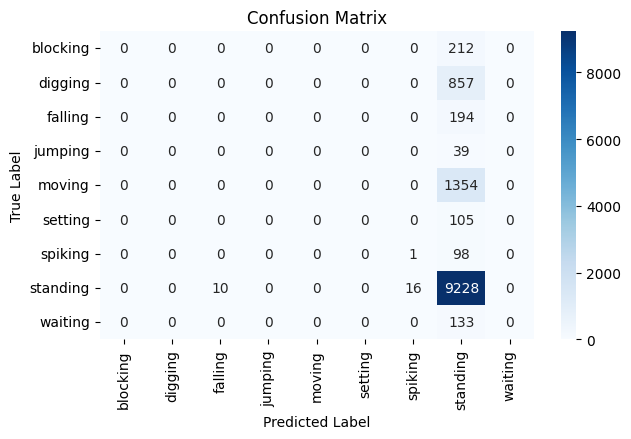

In [222]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = nn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_class, y_pred_classes)
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

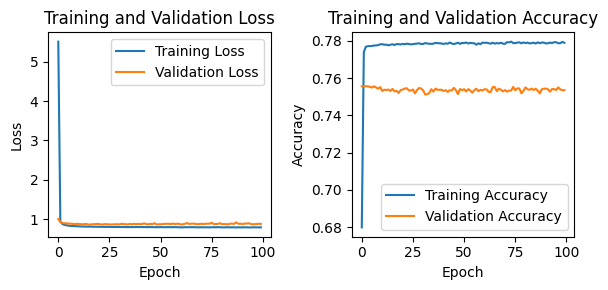

In [ ]:

run1_history = trained.history
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(run1_history['loss'], label='Training Loss')
plt.plot(run1_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(run1_history['accuracy'], label='Training Accuracy')
plt.plot(run1_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Neural Net with adding regularization

In [ ]:
# from keras.src.callbacks import EarlyStopping
from tf_keras import regularizers

#try early stopping to improve model
# early_stopping = EarlyStopping(
#     monitor='val_accuracy',  # You can also use 'val_accuracy'
#     patience=5,          # Number of epochs with no improvement after which training will stop
#     restore_best_weights=True,  # Restore the best weights when training stops
#     verbose=1            # Display messages when training stops early
# )
# train_earlystop = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping]) 

regular_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.01)), 
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)), #ridge regression, encourages small weights to prevent overfitting
    Dense(9, activation='softmax')  
])
regular_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
trained = regular_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32) #take in 32 samples at a time
loss, accuracy = regular_model.evaluate(X_test, y_test)




Epoch 1/100
1531/1531 [==============================] - 9s 5ms/step - loss: 3.2198 - accuracy: 0.6862 - val_loss: 1.4726 - val_accuracy: 0.7486
Epoch 2/100
1531/1531 [==============================] - 8s 5ms/step - loss: 1.4488 - accuracy: 0.7241 - val_loss: 1.4459 - val_accuracy: 0.7390
Epoch 3/100
1531/1531 [==============================] - 8s 5ms/step - loss: 1.2974 - accuracy: 0.7385 - val_loss: 1.6743 - val_accuracy: 0.4359
Epoch 4/100
1531/1531 [==============================] - 8s 5ms/step - loss: 1.1741 - accuracy: 0.7512 - val_loss: 1.1899 - val_accuracy: 0.7482
Epoch 5/100
1531/1531 [==============================] - 8s 5ms/step - loss: 1.1037 - accuracy: 0.7597 - val_loss: 1.2290 - val_accuracy: 0.7549
Epoch 6/100
1531/1531 [==============================] - 8s 5ms/step - loss: 1.0265 - accuracy: 0.7702 - val_loss: 1.0601 - val_accuracy: 0.7550
Epoch 7/100
1531/1531 [==============================] - 8s 5ms/step - loss: 0.9677 - accuracy: 0.7763 - val_loss: 1.0603 - val_ac

383/383 [==============================] - 1s 4ms/step


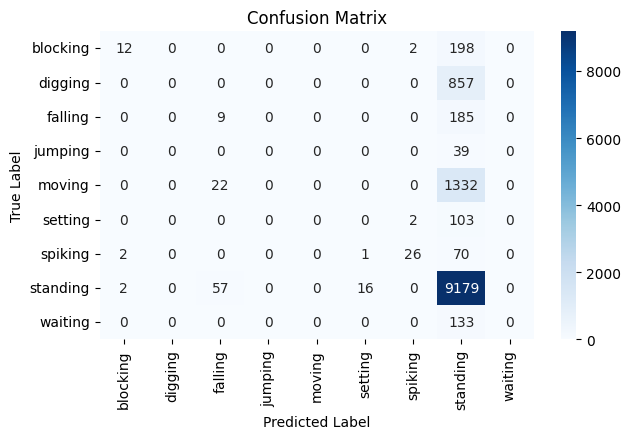

In [223]:
y_pred = regular_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_class, y_pred_classes)
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

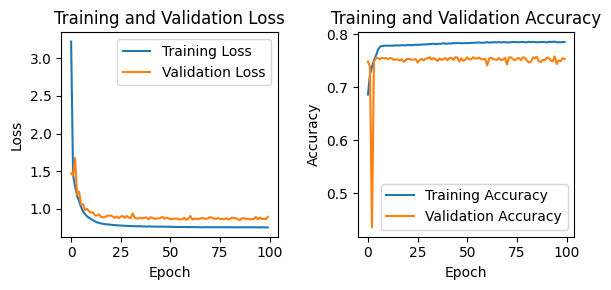

In [220]:
run2_history = trained.history
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(run2_history['loss'], label='Training Loss')
plt.plot(run2_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(run2_history['accuracy'], label='Training Accuracy')
plt.plot(run2_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Neural Net with balanced weights

In [232]:
#ok try balancing weights i didn't realize there was like a billion standing labels
#evaluate the model with precision, recall, and F1-score metrics. This approach will allow you to better understand how well the model performs on the minority classes and avoid bias toward the "Standing" class.
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

y_train_weights = nn_set.iloc[:train_size][target]
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_weights), y=y_train_weights)
weight_dict = dict(zip(np.unique(y_train_weights), class_weights)) #keys are labels, vals are the weights
print(weight_dict)
weight_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.01)), 
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)), #try changing the regular value a bit
    Dense(9, activation='softmax')  
])
weight_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
weight_model_trained = weight_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, class_weight=weight_dict) #take in 32 samples at a time
y_pred_class = weight_model.predict(X_test).argmax(axis=1)
y_true_class = y_test.argmax(axis=1)
f1 = f1_score(y_true_class, y_pred_classes, average='weighted')  
print(f"F1-Score (Weighted): {f1:.4f}")
balanced_acc = balanced_accuracy_score(y_true_class, y_pred_class)
print(f"Balanced Accuracy: {balanced_acc:.4f}")
loss, accuracy = weight_model.evaluate(X_test, y_test)

{0: 8.386748844375964, 1: 2.170255183413078, 2: 4.09556057185854, 3: 32.59281437125748, 4: 1.2768003753225428, 5: 14.750677506775068, 6: 12.25900900900901, 7: 0.14290590212140306, 8: 4.6521367521367525}
Epoch 1/200
1531/1531 [==============================] - 11s 6ms/step - loss: 11.8634 - accuracy: 0.0668 - val_loss: 2.5910 - val_accuracy: 0.0175
Epoch 2/200
1531/1531 [==============================] - 9s 6ms/step - loss: 2.5731 - accuracy: 0.0095 - val_loss: 2.5303 - val_accuracy: 0.0085
Epoch 3/200
1531/1531 [==============================] - 10s 6ms/step - loss: 2.5034 - accuracy: 0.0218 - val_loss: 2.4825 - val_accuracy: 0.0081
Epoch 4/200
1531/1531 [==============================] - 9s 6ms/step - loss: 2.4378 - accuracy: 0.0108 - val_loss: 2.4075 - val_accuracy: 0.0182
Epoch 5/200
1531/1531 [==============================] - 9s 6ms/step - loss: 2.3721 - accuracy: 0.0674 - val_loss: 2.3567 - val_accuracy: 0.0178
Epoch 6/200
1531/1531 [==============================] - 9s 6ms/step 

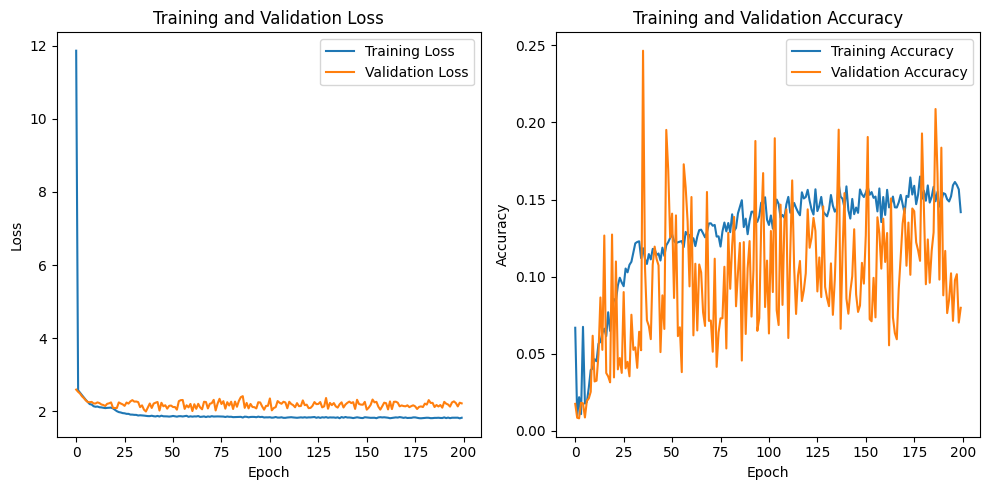

In [238]:
run3_history = weight_model_trained.history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(run3_history['loss'], label='Training Loss')
plt.plot(run3_history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(run3_history['accuracy'], label='Training Accuracy')
plt.plot(run3_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

383/383 [==============================] - 2s 4ms/step


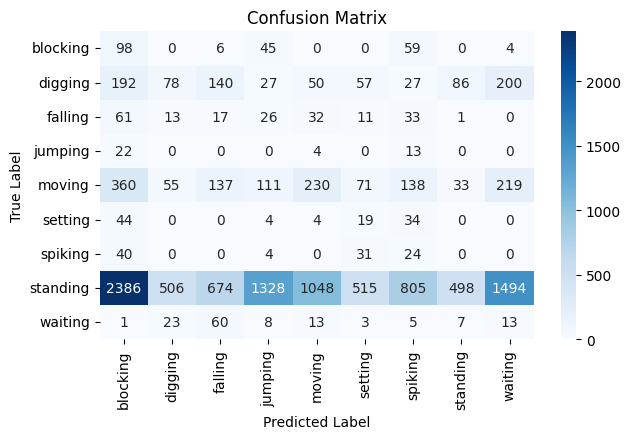

In [239]:
y_pred = weight_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_class, y_pred_classes)
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()